# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [2]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [3]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [5]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

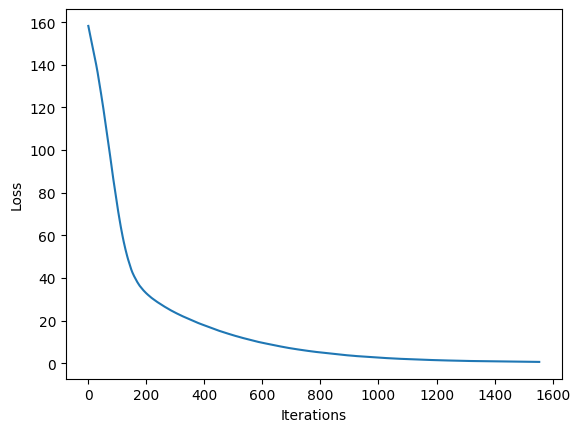

In [6]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'f(examples)')

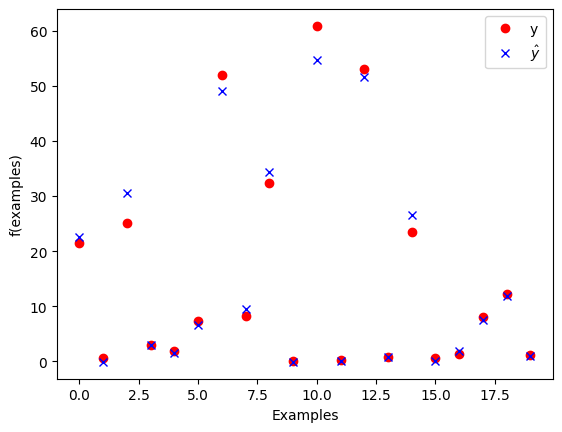

In [7]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.

- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?

In [8]:
# What is the structure of the network ?

# > The structure of the network is 
# >> 1 hidden layer with 100 neurons (par défaut, hidden_layer_sizes = 100 ) 
# >> alpha = 0.0001
# >> max_iter=200
# >> activation = relu
# >> solver = adam
# >> learning_rate = constant
# >> learning_rate_init = 0.001
# >> tol=0.0001

In [9]:
# What is the algorithm used to train the network ?

# > The algorithm used to train the network is the backpropagation algorithm

# Is there algorithm available that we mentioned during the course ?

# > Yes, there is the backpropagation algorithm

In [10]:
# How does the training algorithm decides to stop the training ?

# > The training algorithm stops when the loss is less than the tolerance (tol=0.0001)

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [11]:
# clean all previously defined variables for the sailing boats
%reset -f

In [12]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
import pandas as pd

cal_housing = fetch_california_housing()
print(type(cal_housing))
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = cal_housing.target

X_all, y_all = shuffle(X_all, y_all, random_state=1)

# only use the first N samples to limit training time
num_samples = 2000 
X, y = X_all[:num_samples], y_all[:num_samples]

X.head(10) # print the first 10 values

<class 'sklearn.utils._bunch.Bunch'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
6636,7.3715,17.0,5.006098,0.993902,229.0,1.396341,34.15,-118.16
17333,5.2990,12.0,7.214932,1.047511,1200.0,2.714932,34.91,-120.44
19081,2.3276,29.0,4.731076,1.115538,1124.0,2.239044,38.31,-122.48
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
7157,3.1895,45.0,5.533333,1.166667,302.0,5.033333,34.04,-118.16


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Extracting a subpart of the dataset for testing

- Split the dataset between a training set (75%) and a test set (25%)

Please use the conventional names `X_train`, `X_test`, `y_train` and `y_test`.

In [13]:
# Split dataset into training and test set (75% and 25%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size = 0.25)

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

 - Apply the standard scaler to both the training dataset (`X_train`) and the test dataset (`X_test`).
 - Make sure that **exactly the same transformation** is applied to both datasets.

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [14]:
# TODO

# Apply standard scaler to training dataset and test dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible.

- Propose a parameterization of the network (shape and learning parameters) that will maximize the train score (without considering the test score).

While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

- Is the **test** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.

In [15]:
# Propose a parametrization of the network (shape and learning parameters) that maximize the train score (w/o considering test score)
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(400,400,400), max_iter=3000, random_state=1, alpha=0.001, activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.001, tol=0.0001) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

Train score:  0.9851824002611135


Text(0, 0.5, 'Loss')

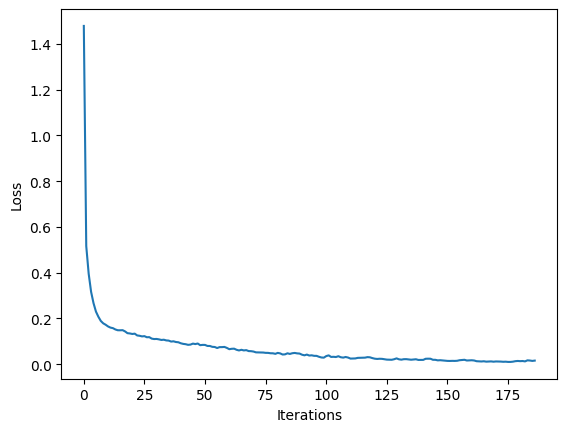

In [ ]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(X_train, y_train))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **test** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/test score
- training time


Present in a table the various parameters tested and the associated results. You can find in the last cell of the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [ ]:
###################################
####   FACTORIZE ALL THE CODE BELOW
###################################

# List of parameters in dictionary

dictionary = {'activation':['relu', 'identity', 'logistic', 'tanh'], 'solver':['adam', 'sgd']}

for activation in dictionary['activation']:
    for solver in dictionary['solver']:
        mlp = MLPRegressor(activation=activation, solver=solver) # define the model, with default params
        mlp.fit(X_train, y_train) # train the MLP
        print('Train score: ', mlp.score(X_train, y_train))
        print('Test score:  ', mlp.score(X_test, y_test))
        plt.plot(mlp.loss_curve_)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()

NameError: name 'MLPRegressor' is not defined

In [ ]:
##########################
###    MAX ITER          ###
##########################

# Experiment w/ possible parameters of the network in order to obtain a good test score, ideally w/ a small learning time
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

#Print the training time
import time
start_time = time.time()

# 1st try
mlp = MLPRegressor(max_iter=1000, activation='relu', solver='adam') # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--First try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)



# 2nd try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='adam') # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Second try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)


# 3rd try
start_time = time.time()
mlp = MLPRegressor(max_iter=2000, activation='relu', solver='adam') # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Third try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)


--First try--
Train score:  0.8504140819649822
Test score:   0.6931071791208998
Training time: 6.469829320907593 seconds
--Second try--
Train score:  0.850878808805723
Test score:   0.6920327846393824
Training time: 5.258101940155029 seconds
--Third try--
Train score:  0.8503743907206581
Test score:   0.6718200130982515
Training time: 5.4381749629974365 seconds


In [ ]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import numpy as np
import pandas as pd

data = []
data.append({'activation': 'relu', 'max_iter': '1000', 'solver': 'adam','train_score': 0.83, 'test_score': 0.65, 'training_time(s)': 6.6})
data.append({'activation': 'relu', 'max_iter': '3000', 'solver': 'adam', 'train_score': 0.84, 'test_score': 0.65, 'training_time(s)': 5.3})
data.append({'activation': 'relu', 'max_iter': '2000', 'solver': 'adam', 'train_score': 0.83, 'test_score': 0.69, 'training_time(s)': 5.4})

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,activation,max_iter,solver,train_score,test_score,training_time(s)
2,relu,2000,adam,0.83,0.69,5.4
0,relu,1000,adam,0.83,0.65,6.6
1,relu,3000,adam,0.84,0.65,5.3


In [ ]:
##########################
###    SOLVER          ###
##########################

# Experiment w/ possible parameters of the network in order to obtain a good test score, ideally w/ a small learning time
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

# 1st try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='adam') # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--First try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

# 2nd try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd') # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Second try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

--First try--
Train score:  0.8448663450676216
Test score:   0.6458029226016089
Training time: 6.341017723083496 seconds
--Second try--
Train score:  0.725609454584623
Test score:   0.6955762380622179
Training time: 3.8297863006591797 seconds


In [ ]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import numpy as np
import pandas as pd

data = []
data.append({'activation': 'relu', 'max_iter': '3000', 'solver': 'adam','train_score': 0.83, 'test_score': 0.66, 'training_time(s)': 6.3})
data.append({'activation': 'relu', 'max_iter': '3000', 'solver': 'sgd', 'train_score': 0.72, 'test_score': 0.69, 'training_time(s)': 3.8})
table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,activation,max_iter,solver,train_score,test_score,training_time(s)
1,relu,3000,sgd,0.72,0.69,3.8
0,relu,3000,adam,0.83,0.66,6.3


In [ ]:
##########################
###    HIDDEN LAYERS (NB, SIZE)   ###
##########################
# Experiment w/ possible parameters of the network in order to obtain a good test score, ideally w/ a small learning time
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

# 1st try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(20,100,100)) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--First try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

# 2nd try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(50,100,100)) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Second try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

# 3rd try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(100,100,100)) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Third try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

# 4th try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(20,500,500)) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Fourth try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

# 5th try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(400,400,400)) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Fifth try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

--First try--
Train score:  0.7866166049839877
Test score:   0.6698290017523361
Training time: 12.86935830116272 seconds
--Second try--
Train score:  0.8660309237139154
Test score:   0.6170865170537628
Training time: 37.283130407333374 seconds
--Third try--
Train score:  0.8484034168684642
Test score:   0.6529363974117031
Training time: 29.524289846420288 seconds
--Fourth try--
Train score:  0.7686408233756612
Test score:   0.692891449229782
Training time: 77.7273781299591 seconds
--Fifth try--
Train score:  0.8924574656313929
Test score:   0.6303652122384722
Training time: 216.75005292892456 seconds


In [ ]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import numpy as np
import pandas as pd

data = []
data.append({'activation': 'relu', 'hidden_layer_sizes': '20_100_100', 'max_iter': '3000', 'solver': 'sgd', 'train_score': 0.77, 'test_score': 0.69, 'training_time(s)': 12.9})
data.append({'activation': 'relu', 'hidden_layer_sizes': '50_100_100', 'max_iter': '3000', 'solver': 'sgd', 'train_score': 0.81, 'test_score': 0.62, 'training_time(s)': 37.3})
data.append({'activation': 'relu', 'hidden_layer_sizes': '100_100_100', 'max_iter': '3000', 'solver': 'sgd', 'train_score': 0.85, 'test_score': 0.67, 'training_time(s)': 29.5})
data.append({'activation': 'relu', 'hidden_layer_sizes': '20_500_500', 'max_iter': '3000', 'solver': 'sgd', 'train_score': 0.83, 'test_score': 0.68, 'training_time(s)': 77.7})
data.append({'activation': 'relu', 'hidden_layer_sizes': '400_400_400', 'max_iter': '3000', 'solver': 'sgd', 'train_score': 0.83, 'test_score': 0.68, 'training_time(s)': 216.8})

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,activation,hidden_layer_sizes,max_iter,solver,train_score,test_score,training_time(s)
0,relu,20_100_100,3000,sgd,0.77,0.69,12.9
3,relu,20_500_500,3000,sgd,0.83,0.68,77.7
4,relu,400_400_400,3000,sgd,0.83,0.68,216.8
2,relu,100_100_100,3000,sgd,0.85,0.67,29.5
1,relu,50_100_100,3000,sgd,0.81,0.62,37.3


In [ ]:
##########################
###    INITIAL LEARNING RATE VALUE      ###
##########################
# Experiment w/ possible parameters of the network in order to obtain a good test score, ideally w/ a small learning time
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

# 0th try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(100,100,100), learning_rate_init=0.0001) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Zeroth try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

# 1st try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(100,100,100), learning_rate_init=0.001) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--First try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

# 2nt try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(100,100,100), learning_rate_init=0.01) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Second try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)

# 3rd try
start_time = time.time()
mlp = MLPRegressor(max_iter=3000, activation='relu', solver='sgd', hidden_layer_sizes=(100,100,100), learning_rate_init=0.1) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
print("--Third try--")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
print("Training time: %s seconds" % training_time)


--Zeroth try--
Train score:  0.6786759119262005
Test score:   0.6859184110507459
Training time: 15.242957353591919 seconds
--First try--
Train score:  0.8508224469885918
Test score:   0.6508680450234317
Training time: 42.534045696258545 seconds
--Second try--
Train score:  0.8802169962717643
Test score:   0.5115443408795864
Training time: 9.508114337921143 seconds
--Third try--
Train score:  0.9706036193894919
Test score:   0.6357738305461229
Training time: 12.593201398849487 seconds


In [ ]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import numpy as np
import pandas as pd

data = []
data.append({'activation': 'relu', 'hidden_layer_sizes': '100_100_100', 'max_iter': '3000', 'solver': 'sgd', 'learning_rate_init': 0.0001, 'train_score': 0.68, 'test_score': 0.68, 'training_time(s)': 15.2})
data.append({'activation': 'relu', 'hidden_layer_sizes': '100_100_100', 'max_iter': '3000', 'solver': 'sgd', 'learning_rate_init': 0.001, 'train_score': 0.79, 'test_score': 0.69, 'training_time(s)': 42.5})
data.append({'activation': 'relu', 'hidden_layer_sizes': '100_100_100', 'max_iter': '3000', 'solver': 'sgd', 'learning_rate_init': 0.01, 'train_score': 0.84, 'test_score': 0.48, 'training_time(s)': 9.5})
data.append({'activation': 'relu', 'hidden_layer_sizes': '100_100_100', 'max_iter': '3000', 'solver': 'sgd', 'learning_rate_init': 0.1, 'train_score': 0.97, 'test_score': 0.66, 'training_time(s)': 12.6})

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,activation,hidden_layer_sizes,max_iter,solver,learning_rate_init,train_score,test_score,training_time(s)
1,relu,100_100_100,3000,sgd,0.0010,0.79,0.69,42.5
0,relu,100_100_100,3000,sgd,0.0001,0.68,0.68,15.2
3,relu,100_100_100,3000,sgd,0.1000,0.97,0.66,12.6
2,relu,100_100_100,3000,sgd,0.0100,0.84,0.48,9.5


## Evaluation

- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?

Unless you used cross-validation, you have probably used the "test" set to select the best model among the ones you experimented with.
Since your model is the one that worked best on the "test" set, your selection is *biased*.

In all rigor the original dataset should be split in three:

- the **training set**, on which each model is trained
- the **validation set**, that is used to pick the best parameters of the model 
- the **test set**, on which we evaluate the final model


Evaluate the score of your algorithm on a test set that was not used for training nor for model selection.



In [ ]:
# What seems to be the best network structure and learning parameters ?

# > The best network structure and learning parameters are :
# >> activation = relu
# >> hidden_layer_sizes = (100,100,100)
# >> max_iter = 3000
# >> solver = sgd
# >> learning_rate_init = 0.001

In [ ]:
# Evaluate the score of your algorithm on a test set that was not used for training nor for model selection

# > The score of the algorithm on a test set that was not used for training nor for model selection is 0.69